# 03 __Descriptive Statistics__

Descriptive statistics helps to simplify large amounts of data
in a sensible way. In constrast to _inferential statistics_, in descriptive
statistics we do not draw conclusions beyond the data we are analyzing;
neither do we reach anu conclusions regarding hypotheses we may make.
We do not try to infer characteristics of the "population" of the data,
but claim to present quantitative descriptios of it in a manageble form.
It is simply a way to describe the data.

Statistics, and particulatly descriptive statistics, is based on two main
concepts:
 + a __population__ is a collection of objects, items ('units') about which
   information is sought;
 + a __sample__ is a part of the population that is observed.


Descriptive statustics applies the concepts, measures and temrs that are used
to describe the basic features of the samples in a study.

In order to describe the sampled ata and to be able to infer any conclusion, we
should go through several steps:

1. __Data preparation__: given a specific example, we need to prepare the
   data for generating statistically valid descriptions.
2. __Descriptive statistics__: this generates different statsitics to describe and
   summarize the data concisely and evaluate different ways to visualize them.



### Adult Example
Let us consider a public database called the “Adult” dataset, hosted on the UCI’s
Machine Learning Repository

In [27]:
# first read the data

def char_to_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
    
data = []
with open('input/adult/adult.data', 'r') as file:
    for line in file:
        if '\n' in line:
            line = line.replace('\n', '')
        record = line.split(', ')
        if len(record) == 15:
            data.append(
                [
                    char_to_int(record[0]), record[1],
                    char_to_int(record[2]), record[3],
                    char_to_int(record[4]), record[5],
                    record[6], record[7], record[8],
                    record[9], char_to_int(record[10]),
                    char_to_int(record[11]),
                    char_to_int(record[12]),
                    record[13], record[14]
                ]
            )
        

In [28]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K']]


In [29]:
# use a pandas dataframe
import pandas as pd
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'fnlwgt',
    'education', 'education_num', 'marital',
    'occupation', 'relationship', 'race',
    'sex', 'capital_gain', 'capital_loss',
    'hr_per_week', 'country', 'income'
]

In [30]:
# get shape of dataframe
df.shape

(32561, 15)

In [31]:
# count items per country
counts = df.groupby('country').size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [32]:
# let us split people according to their gender
# into two grroups
male = df[df['sex'].str.lower() == 'male']
female = df[df['sex'].str.lower() == 'female']

In [34]:
# high income professionals separatef by sex
high_income_male = df[
    (df['sex'].str.lower() == 'male') &
    (df['income'] == '>50K')
]

high_income_female = df[
    (df['sex'].str.lower() == 'female') &
    (df['income'] == '>50K')
]

## __Exploratory Data Analysis__ (EDA)

One of the main goals of EDA is to visualize and summarize the sample distribution, thereby
allowing us to make tentative assumptions about the population distribution.

In [39]:
high_income = df[df['income'] == '>50K']

print('the rate of people with high income is: ', int(len(high_income) / float(len(df)) * 100), '%')
print('the rate of males with high income is: ', int(len(high_income_male) / float(len(df)) * 100), '%')
print('the rate of females with high income is: ', int(len(high_income_female) / float(len(df)) * 100), '%')

the rate of people with high income is:  24 %
the rate of males with high income is:  20 %
the rate of females with high income is:  3 %


Out observed data represent just a finite set of samples of an often infinite number of possible
ssamples. The characteristics of out randomly observed samples are interesting only
to the degree that they represent the ppùlation of the data they came from.

### __Mean__
One of the first measurement we sue to have a look at the data is to obtain
_sample statistics_ from the data, such as the sample mean.
Given a sample of _n_ values, $\{x_i\}, i = 1, 2, ..., n$, the _mean_, $\mu$ is the sum
of the values divided by the number of values:

$$ \mu = \frac{1}{n} \sum_{i = 1}^{n} x_i$$

The terms _mean_ and _average_ are often used interchangeably. I fact the main distinction
between them is that the mean of a sample is the summary statistic compputed by the equation above,
while an average is not strictly defined and could be one of many summary statistics that can be
chosen to describe the central tendency of a sample.

In [47]:
# the averages of out dataset
print(f'Average age of female: {male["age"].mean():.3f}')
print(f'Average age of male: {male["age"].mean():.3f}')
print(f'Average age of high-income male: {high_income_male["age"].mean():.3f}')
print(f'Average age of high-income female: {high_income_female["age"].mean():.3f}')

Average age of female: 39.434
Average age of male: 39.434
Average age of high-income male: 44.626
Average age of high-income female: 42.126


This difference in the sample means can be considered initial evidence that there
are differences between men and women with high income!

__Comment__: Later, we will work with both concepts: the population mean and the
sample mean. We should not confuse them! The first is the mean of samples taken
from the population; the second, the mean of the whole population.

### __Variance__
The mean is not usually a sufficient descriptor of the data. We can go further by
knowing two numbers: mean and variance. The variance σ 2 describes the spread of
the data and it is defined as follows:

$$ \sigma^2 = \frac{1}{n} \sum_{i}(x_i - \mu)^2 $$

The term (x i − μ) is called the __deviation from the mean__, so the variance is the mean
squared deviation. The square root of the variance, σ, is called the standard deviation.
We consider the standard deviation, because the variance is hard to interpret (e.g., if
the units are grams, the variance is in grams squared).

In [49]:
print(f'age variance of female: {male["age"].var():.3f}')
print(f'age variance of male: {male["age"].var():.3f}')
print(f'age variance of high-income male: {high_income_male["age"].var():.3f}')
print(f'age variance of high-income female: {high_income_female["age"].var():.3f}')

age variance of female: 178.774
age variance of male: 178.774
age variance of high-income male: 109.945
age variance of high-income female: 109.414


### __Sample Median__
The mean of the samples is a good descriptor, but it has an important drawback: what
will happen if in the sample set there is an error with a value very different from the
rest? For example, considering hours worked per week, it would normally be in a
range between 20 and 80; but what would happen if by mistake there was a value
of 1000? An item of data that is significantly different from the rest of the data is
called an outlier. In this case, the mean, μ, will be drastically changed towards the
outlier. One solution to this drawback is offered by the statistical median, μ 12 , which
is an order statistic giving the middle value of a sample. In this case, all the values
are ordered by their magnitude and the median is defined as the value that is in the
middle of the ordered list. Hence, it is a value that is much more robust in the face
of outliers.

In [52]:
# median age of working men and women
male_median = male['age'].median()
female_median = female['age'].median()
print('male age median: ', male_median)
print('female age median: ', female_median)

male age median:  38.0
female age median:  35.0


### __Quantiles and Percentiles__
Sometimes we are interested in observing how sample data are distributed in general.
In this case, we can order the samples $\{x_i\}$, then find the $x_p$ so that it divides the data
into two parts, where:
 + a fraction _p_ of the data values is less than or equal to $x_p$ and
 + the remaining feaction $(1 - p)$ is greater than $x_p$

The value $x_p$ is the _p-th_ quantile, or the 100 * _p-th_ percentile.

### __Data Distributions__

Summarizing data by just looking at their mean, median, and variance can be danger-
ous: very different data can be described by the same statistics. The best thing to do
is to validate the data by inspecting them. We can have a look at the data distribution,
which describes how often each value appears (i.e., what is its frequency).

The most common representation of a distribution is a histogram, which is a graph
that shows the frequency of each value. Let us show the age of working men and
women separately.

In [58]:
import matplotlib.pyplot as plt

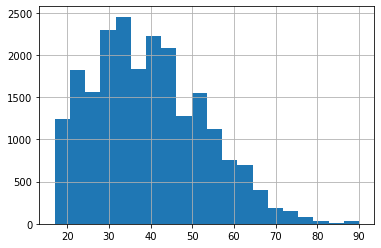

In [59]:
male_age = male['age'].copy()
male_age.hist(histtype = 'stepfilled', bins = 20)
plt.show()

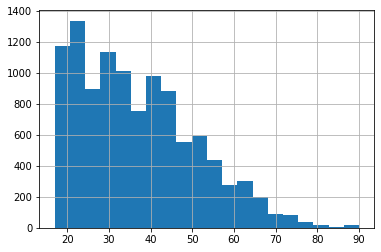

In [60]:
female_age = female['age'].copy()
female_age.hist(histtype = 'stepfilled', bins = 20)
plt.show()

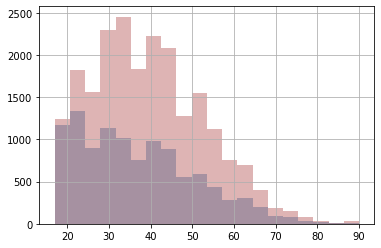

In [65]:
# overlap the histograms
import seaborn as sns
female_age.hist(histtype = 'stepfilled', alpha = 0.5, bins = 20)
male_age.hist(histtype = 'stepfilled', alpha = 0.5, color = sns.desaturate('indianred', 0.75),
              bins = 20)
plt.show()

In [74]:
female_age

4        28
5        37
6        49
8        31
12       23
         ..
32546    37
32549    43
32556    27
32558    58
32560    52
Name: age, Length: 10771, dtype: int64

In [75]:
female_age_normed

4        0.150685
5        0.273973
6        0.438356
8        0.191781
12       0.082192
           ...   
32546    0.273973
32549    0.356164
32556    0.136986
32558    0.561644
32560    0.479452
Name: age, Length: 10771, dtype: float64

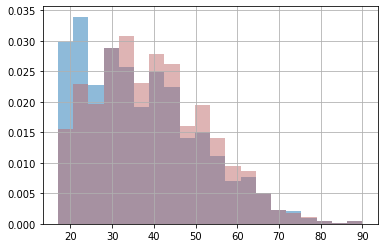

In [80]:
# we can normalize the frequencies of the histogram bu
# dividing/normalizing by n,  the number of samples.
# the normalized histogram is called Probability Mass Function (PMF)
female_age.hist(
    histtype = 'stepfilled', alpha = 0.5, bins = 20, density = True
)
male_age.hist(
    histtype = 'stepfilled', alpha = 0.5, color = sns.desaturate('indianred', 0.75),
    bins = 20, density = True
)
plt.show()

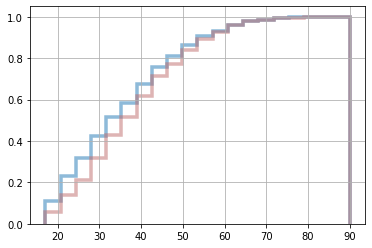

In [89]:
# the Cumulative Distribution Fcuntion (CDF) or just distribution function,
# describes the probability that a real-valued random variable X with a 
# given probability distrubution will be found to have a value
# less than or equal to x. Let us show the CDF of age distribution for both men and women
female_age.hist(
    histtype = 'step', alpha = 0.5, bins = 20, cumulative = True,
    linewidth = 3.5, density = True,
)
male_age.hist(
    histtype = 'step', alpha = 0.5, color = sns.desaturate('indianred', 0.75),
    bins = 20, cumulative = True, density = True,
    linewidth = 3.5
)
plt.show()

### __Outlier Treatment__
As mentioned before, outliers are data samples with a value
that is far from the central tendency. Different rules can be defined to detet outliers,
as follows:
 + computing samples that are far from the median
 + computing samples whose values exceed the mean by 2 or 3 standard deviations


For example, in our case, we are interested in the age statistics of men versus
women with high incomes and we can see that in our dataset, the minimum age is 17
years and the maximum is 90 years. We can consider that some of these samples are
due to errors or are not representable. Applying the domain knowledge, we focus on
the median age (37, in our case) up to 72 and down to 22 years old, and we consider
the rest as outliers.

In [114]:
df2 = df[
    (df['income'] == '>50K') &
    (df['age'] < df['age'].median() + 35) &
    (df['age'] > df['age'].median() - 15)
]

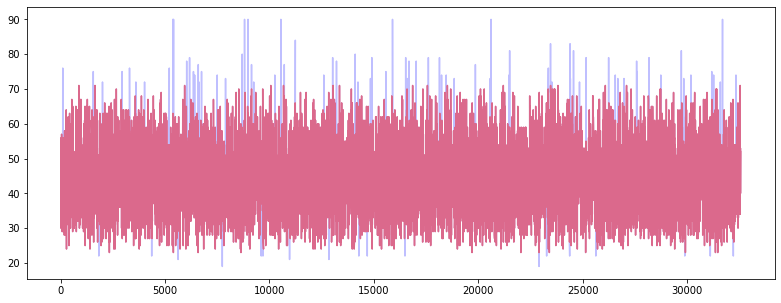

In [110]:
# let us visualzie how many outliers are removed
# from the whole data
plt.figure(figsize = (13.4, 5))
df['age'][
    df['income'] == '>50K'
].plot(alpha = 0.25, color = 'blue')

df2['age'][
    df2['income'] == '>50K'
].plot(alpha = 0.45, color = 'red')

plt.show()

In [111]:
# the red sows the cleaned data without the considere outliers
# lets see summaries of the new and old dfs

In [112]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [113]:
df2.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,7745.000000,7.745000e+03,7745.000000,7745.000000,7745.000000,7745.000000
mean,43.969787,1.881984e+05,11.615107,3927.157392,193.659135,45.589025
std,9.972955,1.025561e+05,2.374147,14390.995436,592.093391,10.875973
min,23.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.192870e+05,10.000000,0.000000,0.000000,40.000000
50%,43.000000,1.761850e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.311050e+05,13.000000,0.000000,0.000000,50.000000
max,71.000000,1.226583e+06,16.000000,99999.000000,3004.000000,99.000000


In [117]:
df2[
    df2['sex'].str.lower() == 'male'
].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,6582.000000,6.582000e+03,6582.000000,6582.000000,6582.000000,6582.000000
mean,44.322242,1.889591e+05,11.582802,3914.093133,197.332270,46.486478
std,9.944471,1.030648e+05,2.397080,14516.253579,595.685281,10.567230
min,23.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,37.000000,1.200612e+05,9.000000,0.000000,0.000000,40.000000
50%,44.000000,1.768265e+05,12.000000,0.000000,0.000000,44.500000
75%,51.000000,2.335080e+05,13.000000,0.000000,0.000000,50.000000
max,71.000000,1.226583e+06,16.000000,99999.000000,3004.000000,99.000000


In [118]:
df2[
    df2['sex'].str.lower() == 'female'
].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,41.975064,183893.237317,11.797936,4001.094583,172.871023,40.509888
std,9.903157,99561.869587,2.232123,13666.225189,571.143337,11.202741
min,23.000000,19700.000000,3.000000,0.000000,0.000000,2.000000
25%,34.500000,116594.000000,10.000000,0.000000,0.000000,38.000000
50%,41.000000,172274.000000,13.000000,0.000000,0.000000,40.000000
75%,49.000000,221858.500000,13.000000,0.000000,0.000000,45.000000
max,71.000000,953588.000000,16.000000,99999.000000,3004.000000,99.000000


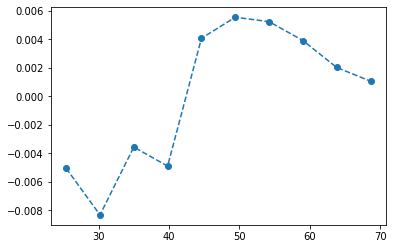

In [127]:
# let us now observe the difference of men and women
# incomes in the cleaned subset with some more details
male_age = df2[
    df2['sex'].str.lower() == 'male'
]['age'].copy()

female_age = df2[
    df2['sex'].str.lower() == 'female'
]['age'].copy()

import numpy as np
male_count, male_bins = np.histogram(male_age, density = True)
female_count, female_bins = np.histogram(female_age, density = True)

values = [
    (male_bins[i] + male_bins[i + 1]) / 2
    for i in range(0, len(male_bins) - 1)
]
plt.plot(values, male_count - female_count, 'o--')

In [128]:
# Differences in high-income earner men versus women as a function of age

### __Measuring Asymmetry: Skewness and Pearson's Median Skewnwss Coefficient__

For univariate data, the formula for _skewness_ is a statistic that measures the
assymetry of the set of n data samples, $x_i$:

$$ g_1 = \frac{1}{n} \frac{\sum_{i}(x_i - \mu)^3}{\sigma^3} $$

Negative deviation indicates that the distribution “skews left” (it extends further
to the left than to the right). One can easily see that the skewness for a normal
distribution is zero, and any symmetric data must have a skewness of zero.
A simpler alternative is to look at the relationship between the mean $\mu$ and the
median $\mu_{12}$

In [137]:
def skewness(X):
    sum = 0; sigma = X.std(); mu = X.mean(); n = len(X);
    for xi in X:
        sum += (xi - mu) ** 3
    return sum / (n * (sigma ** 3))

print(f'skewness of the male population: {skewness(male_age):.3f}')
print(f'skewness of the female population: {skewness(female_age):.3f}')

skewness of the male population: 0.266
skewness of the female population: 0.406


That is, the female population is more skewed than the male, probably
since men could be most prone to retire latern than women
The __Person's median skewness coefficient__ is a more rosbust alternative
to the skewness coeffiient and is defines as follows:

$$ g_p = 3(\mu - \mu_{12})\sigma $$

In [139]:
def pearson_skewness(X):
    return 3 * (X.mean() - X.median()) * X.std()

print(f'pearson skewness of the male population: {pearson_skewness(male_age):.3f}')
print(f'pearson skewness of the female population: {pearson_skewness(female_age):.3f}')

pearson skewness of the male population: 9.614
pearson skewness of the female population: 28.969


After exploring the data, we obtained some apparent effects that seem to support
our initial assumptions. For example, the mean age for men in our dataset is 39.4
years; while for women, is 36.8 years. When analyzing the high-income salaries, the
mean age for men increased to 44.6 years; while for women, increased to 42.1 years.
When the data were cleaned from outliers, we obtained mean age for high-income
men: 44.3, and for women: 41.8. Moreover, histograms and other statistics show the
skewness of the data and the fact that women used to be promoted a little bit earlier
than men, in general.

In [ ]:
### __Continuous Distribution__
